In [116]:
import geopandas as gpd
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd


In [117]:
# extract election results and data clean

election_path = "../Resources/2020ElectionResults.xlsx"

# skip titles row
election_data = pd.read_excel(election_path, skiprows = 0)

# set index to state for better reading
#election_data = election_data.set_index('STATE')

#election_data = election_data[['TOTAL VOTES', 'Votes', '%', 'Votes.1', "%.1", 'Votes.2', "%.2"]]


# remove empty/blank rows
#election_data = election_data.dropna()

# rename columns for better readibility
election_data = election_data.rename(columns = {"TOTAL VOTES": 'Total Votes',
                                                "Votes": "Democrat Votes",
                                                "%": 'Democrat EV %',
                                                "EV": "Democrat EV",
                                                "Votes.1": "Republican Votes",
                                                "%.1": "Republican EV %",
                                                "EV.1": "Replican EV",
                                                "Votes.2": "Other Votes",
                                                "%.2": "Other EV %",
                                                "EV.2": "Other EV"})

# fills NaNs as 0s so I can sum properly due to Maine and Nebraska (can't remove NaN or else it removes everything)
election_data = election_data.fillna(0)

"""
totals_row = election_data.sum()

election_data.loc['Total'] = totals_row

election_data
"""
election_data


,STATE,Total Votes,Democrat Votes,Democrat EV %,Democrat EV,Republican Votes,Republican EV %,Replican EV,Other Votes,Other EV %,Other EV
0,Alabama,2323282,849624,0.3657,0.0,1441170,0.6203,9.0,32488,0.0140,0.0
1,Alaska,359530,153778,0.4277,0.0,189951,0.5283,3.0,15801,0.0439,0.0
2,Arizona,3387326,1672143,0.4936,11.0,1661686,0.4906,0.0,53497,0.0158,0.0
3,Arkansas,1219069,423932,0.3478,0.0,760647,0.6240,6.0,34490,0.0283,0.0
4,California,17500881,11110250,0.6348,55.0,6006429,0.3432,0.0,384202,0.0220,0.0
5,Colorado,3256952,1804352,0.5540,9.0,1364607,0.4190,0.0,87993,0.0270,0.0
6,Connecticut,1824280,1080680,0.5924,7.0,715291,0.3921,0.0,28309,0.0155,0.0
7,Delaware,504010,296268,0.5878,3.0,200603,0.3980,0.0,7139,0.0142,0.0
8,District of Columbia,344356,317323,0.9215,3.0,18586,0.0540,0.0,8447,0.0245,0.0
9,Florida,11067456,5297045,0.4786,0.0,5668731,0.5122,29.0,101680,0.0092,0.0


In [147]:
clean_data = election_data.copy(deep=True)

for index, rows in clean_data.iterrows():
    if (rows['STATE'] == 'CD-1') | (rows['STATE'] == 'CD-2') | (rows['STATE'] == 'CD-3'):
        clean_data.loc[index,['Total Votes', 'Democrat Votes', 'Democrat EV %', 'Republican Votes', 'Republican EV %', 'Other Votes', 'Other EV %', 'Other EV']] = 0
    

totals = clean_data.sum()
clean_data.loc[len(clean_data)] = totals

for index, rows in clean_data.iterrows():   
    if (index == 56):
        clean_data.loc[index,['STATE']] = 'Totals'
        clean_data.loc[index,['Democrat EV %']] = rows['Democrat EV %'].astype(str)

clean_data


AttributeError: 'float' object has no attribute 'astype'

In [72]:
# set Maine and Nebraska Totals as 0 as they are congressional districts... votes will be double counted
"""
cong_dist = election_data[(election_data['STATE'] == 'CD-1') | (election_data['STATE'] == 'CD-2') \
                            | (election_data['STATE'] == 'CD-3')]


for index, row in cong_dist.iterrows():
    cong_dist.loc[index,['Total Votes', 'Democrat Votes', 'Democrat EV %', 'Republican Votes', 'Republican EV %', 'Other Votes', 'Other EV %', 'Other EV']] = 0


clean_data = election_data[election_data['STATE'].isin(cong_dist['STATE']) == False].reset_index(drop=True).set_index('STATE')

"""
totals = clean_data.sum()

clean_data.loc[len(clean_data)] = totals

for index,row in cong_d



,STATE,Total Votes,Democrat Votes,Democrat EV %,Democrat EV,Republican Votes,Republican EV %,Replican EV,Other Votes,Other EV %,Other EV
0,Alabama,2323282,849624,0.3657,0.0,1441170,0.6203,9.0,32488,0.0140,0.0
1,Alaska,359530,153778,0.4277,0.0,189951,0.5283,3.0,15801,0.0439,0.0
2,Arizona,3387326,1672143,0.4936,11.0,1661686,0.4906,0.0,53497,0.0158,0.0
3,Arkansas,1219069,423932,0.3478,0.0,760647,0.6240,6.0,34490,0.0283,0.0
4,California,17500881,11110250,0.6348,55.0,6006429,0.3432,0.0,384202,0.0220,0.0
5,Colorado,3256952,1804352,0.5540,9.0,1364607,0.4190,0.0,87993,0.0270,0.0
6,Connecticut,1824280,1080680,0.5924,7.0,715291,0.3921,0.0,28309,0.0155,0.0
7,Delaware,504010,296268,0.5878,3.0,200603,0.3980,0.0,7139,0.0142,0.0
8,District of Columbia,344356,317323,0.9215,3.0,18586,0.0540,0.0,8447,0.0245,0.0
9,Florida,11067456,5297045,0.4786,0.0,5668731,0.5122,29.0,101680,0.0092,0.0


In [ ]:
"""
clean_data = election_data[election_data['STATE'].isin(cong_dist['STATE']) == False].reset_index(drop=True).set_index('STATE')


totals = clean_data.sum()

clean_data.loc[len(clean_data)] = totals

clean_data
"""


In [4]:
# Replace Shapefile (part of geopandas)
shapefile_path = 'ne_10m_admin_1_states_provinces.shp'

# Read the Shapefile
gdf = gpd.read_file(shapefile_path)

# read GeoJSON file
output_geojson_path = 'output.geojson'

# Save as GeoJSON to load in later
gdf.to_file(output_geojson_path, driver='GeoJSON')

D:\Anaconda\envs\dev\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [7]:
# Load the GeoJSON file for US states
fp = "output.geojson"
map_df = gpd.read_file(fp)

us_df = map_df.loc[map_df['iso_a2'] == 'US', :]

us_df.head()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
1235,Admin-1 states provinces,2,USA-3519,3519,US-WA,http://en.wikipedia.org/wiki/Washington_(state),US,6,Washington,WA|Wash.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-122.75302 48.99251, -122.6532..."
1237,Admin-1 states provinces,2,USA-3518,3518,US-ID,http://en.wikipedia.org/wiki/Idaho,US,1,Idaho,ID|Idaho,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-117.03815 48.99251, -116.93818 48.9..."
1238,Admin-1 states provinces,2,USA-3515,3515,US-MT,http://en.wikipedia.org/wiki/Montana,US,1,Montana,MT|Mont.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-116.04816 48.99251, -115.83913 48.9..."
1241,Admin-1 states provinces,2,USA-3516,3516,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US,1,North Dakota,ND|N.D.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-104.04757 48.99262, -103.96949 48.9..."
1243,Admin-1 states provinces,2,USA-3514,3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US,1,Minnesota,MN|Minn.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-97.22609 48.99267, -97.15538 48.992..."


D:\Anaconda\envs\dev\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


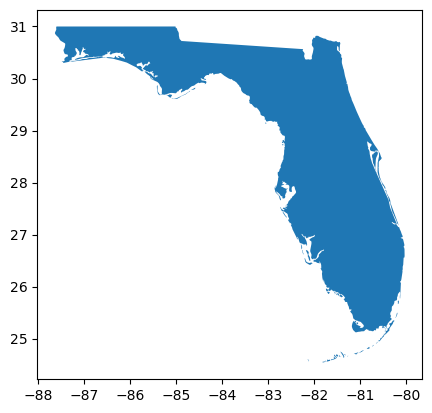

In [6]:
data = {'state': ['Florida']}

df = pd.DataFrame(data)

# Plot the map
florida_row = us_df[us_df['name'].isin(df['state']) == True].plot()

plt.show()